# (i) Qualitative Analysis

## 1. Strong Positive Correlations
Based on both visual analysis and correlation coefficients, several attributes showed significant relationships with body fat percentage:
- **Abdomen circumference** demonstrated the strongest positive correlation (r = 0.670)
- **Thigh circumference** showed a moderate positive correlation (r = 0.493)
- **Knee circumference** also exhibited a moderate positive correlation (r = 0.478)

## 2. Weak or Negative Correlations
Some attributes showed weak or negative relationships with body fat percentage:
- **Wrist circumference** displayed a weak negative correlation (r = -0.096)
- **Height** showed a weak negative correlation (r = -0.201)
- **Body Density** exhibited a perfect negative correlation (r = -0.999), which is expected given that body fat percentage is typically calculated from body density

## 3. Visualization Insights
- The scatter matrix plots revealed clear linear relationships between body fat percentage and several measurements, particularly abdomen circumference
- The parallel coordinates plot highlighted consistent patterns between certain body measurements and body fat percentage, reinforcing the correlation findings
- The stacked line plot demonstrated that some measurements tend to follow similar trends, suggesting potential interrelationships between input variables

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   Age      252 non-null    int64  
 2   Weight   252 non-null    float64
 3   Height   252 non-null    float64
 4   Neck     252 non-null    float64
 5   Chest    252 non-null    float64
 6   Abdomen  252 non-null    float64
 7   Hip      252 non-null    float64
 8   Thigh    252 non-null    float64
 9   Knee     252 non-null    float64
 10  Ankle    252 non-null    float64
 11  Biceps   252 non-null    float64
 12  Forearm  252 non-null    float64
 13  Wrist    252 non-null    float64
 14  BodyFat  252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB
None

Dataset Summary Statistics:
          Density         Age      Weight      Height        Neck       Chest  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  2

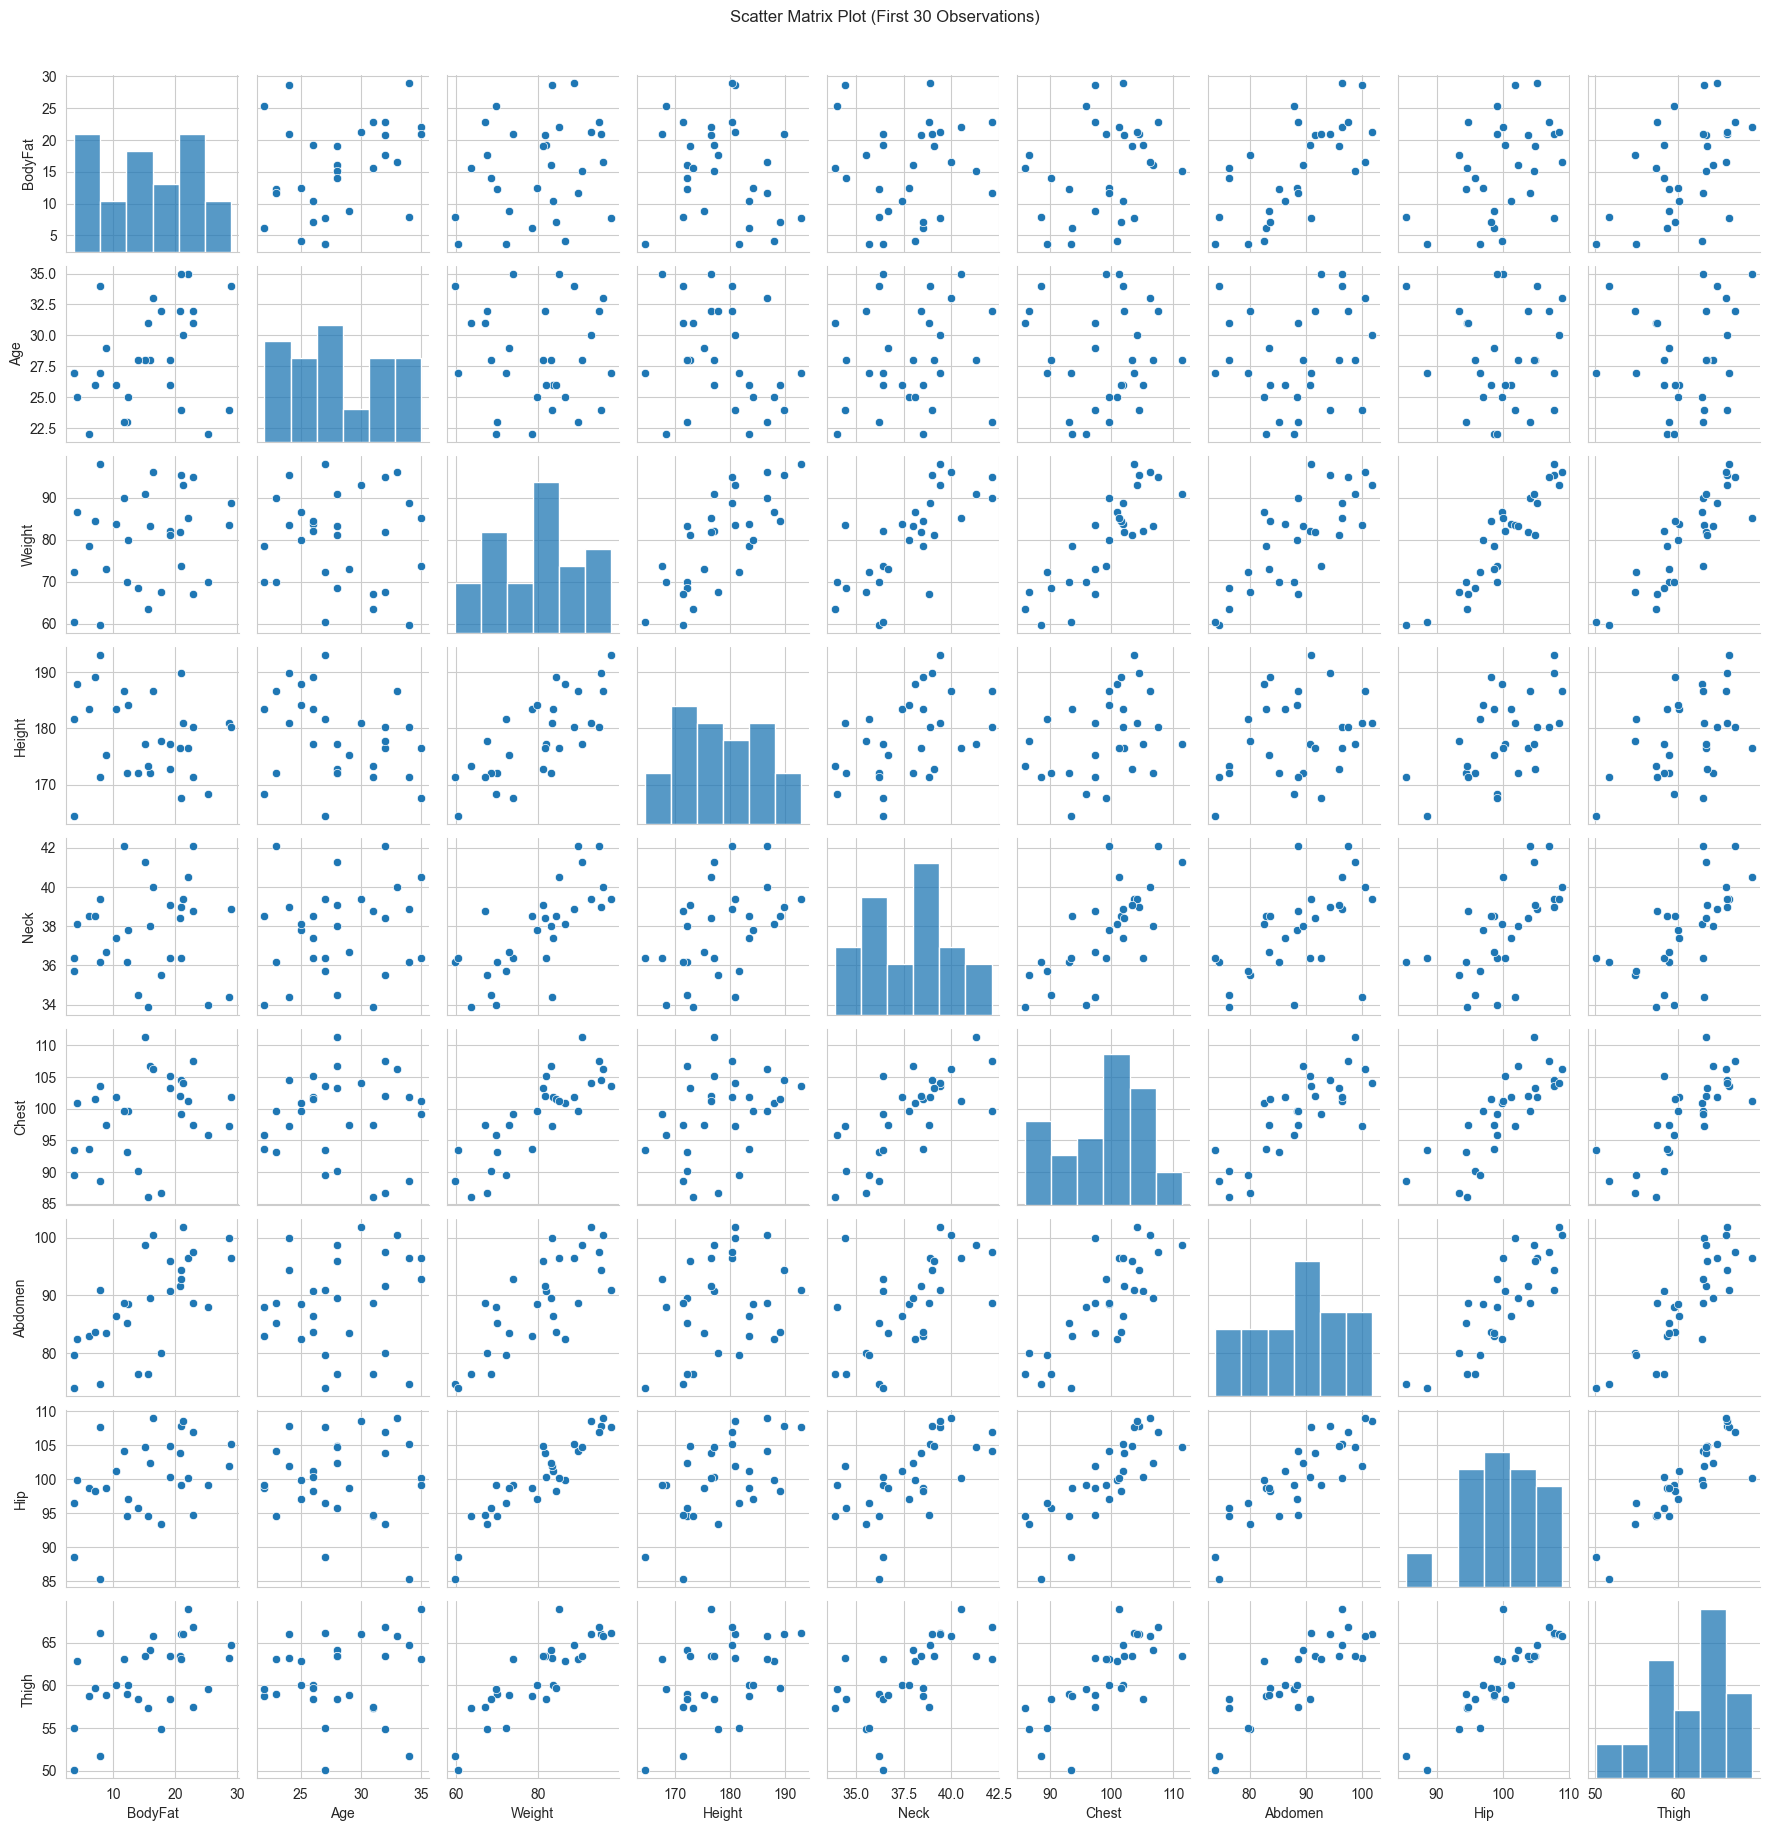

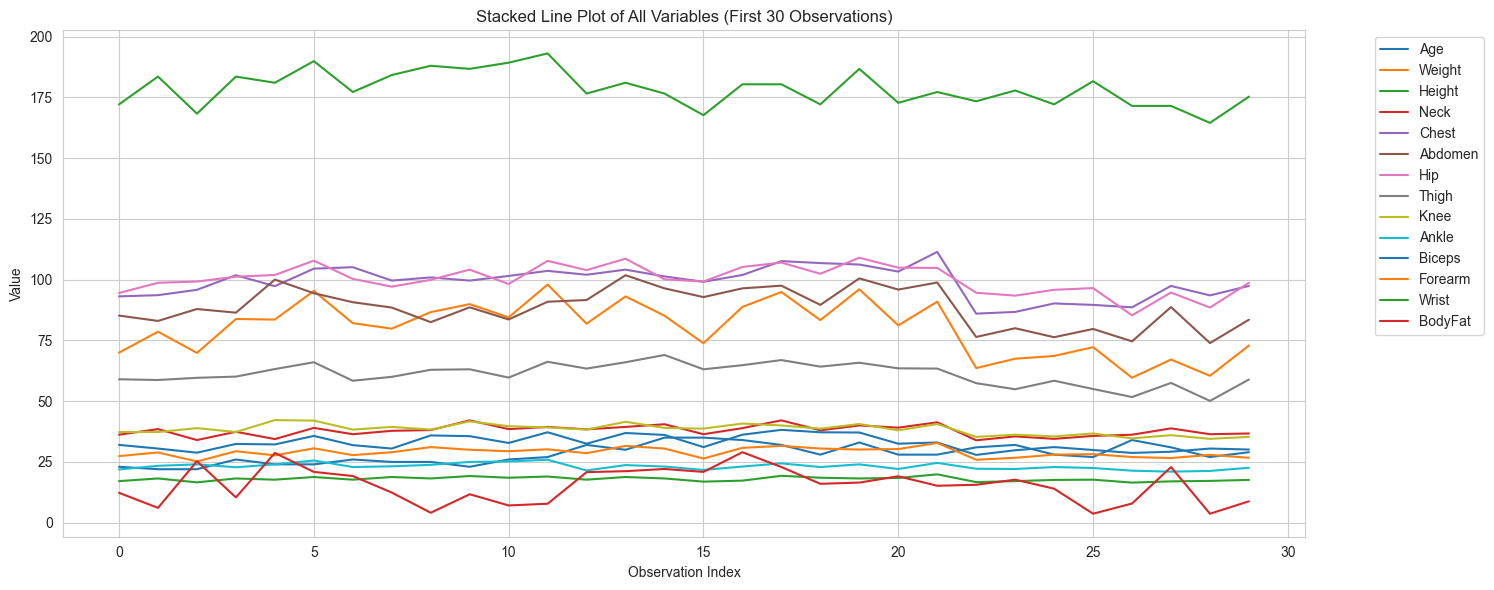

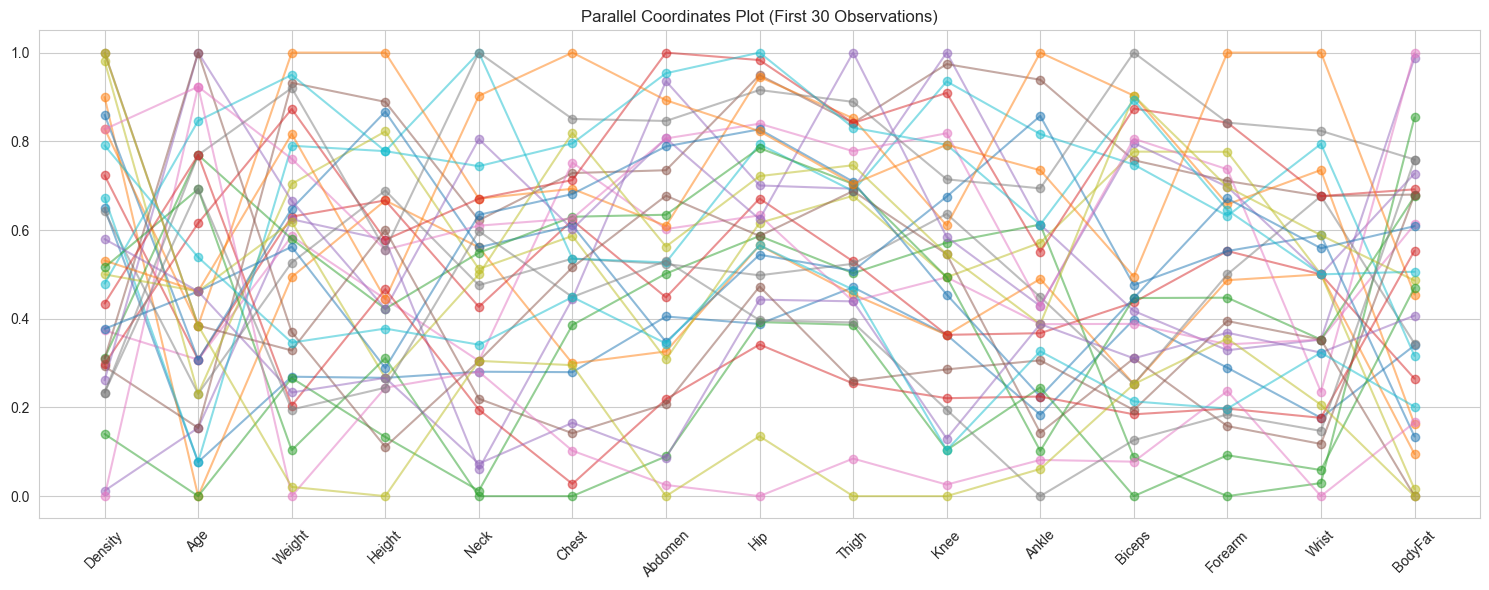


Correlations with BodyFat:
BodyFat    1.000000
Abdomen    0.669576
Thigh      0.492747
Knee       0.477966
Hip        0.407450
Age        0.315751
Chest      0.288261
Weight     0.225383
Biceps     0.191357
Neck       0.051631
Ankle      0.007840
Forearm    0.005545
Wrist     -0.096249
Height    -0.200546
Density   -0.999807
Name: BodyFat, dtype: float64

Qualitative Analysis Summary:
Based on the visual analysis of the first 30 data points:
1. Strong positive relationships with BodyFat appear to exist for:
   - Abdomen (correlation: 0.670)
   - Thigh (correlation: 0.493)
   - Knee (correlation: 0.478)

2. Weak or no clear relationships appear to exist for:
   - Wrist (correlation: -0.096)
   - Height (correlation: -0.201)
   - Density (correlation: -1.000)

3. The parallel coordinates plot suggests that there are some consistent patterns
   between certain body measurements and body fat percentage.

4. The stacked line plot shows that some measurements tend to follow similar trends,


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set default figure size and style
plt.rcParams['figure.figsize'] = [10, 6]
# sns.set_theme()

try:
    # Load the data
    df = pd.read_csv('Body_Fat.csv')
    
    # Display basic information about the dataset
    print("Dataset Info:")
    print(df.info())
    print("\nDataset Summary Statistics:")
    print(df.describe())
    
    # Check for any missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Select first 30 data points
    df_30 = df.head(30)

    # 1. Scatter Matrix Plot
    features = ['BodyFat', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh']
    fig = sns.pairplot(df_30[features], height=2, aspect=1)
    plt.suptitle('Scatter Matrix Plot (First 30 Observations)', y=1.02)
    plt.show()

    # 2. Stacked Line Plot
    plt.figure(figsize=(15, 6))
    for column in df_30.columns[1:]:  # Exclude BodyFat
        plt.plot(df_30.index, df_30[column], label=column)
    plt.title('Stacked Line Plot of All Variables (First 30 Observations)')
    plt.xlabel('Observation Index')
    plt.ylabel('Value')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 3. Parallel Coordinates Plot
    plt.figure(figsize=(15, 6))
    df_normalized = df_30.copy()
    for column in df_normalized.columns:
        df_normalized[column] = (df_normalized[column] - df_normalized[column].min()) / \
                               (df_normalized[column].max() - df_normalized[column].min())

    for i in range(30):
        plt.plot(range(len(df_normalized.columns)), df_normalized.iloc[i, :], 
                 marker='o', alpha=0.5)
    plt.xticks(range(len(df_normalized.columns)), df_normalized.columns, rotation=45)
    plt.title('Parallel Coordinates Plot (First 30 Observations)')
    plt.tight_layout()
    plt.show()

    # 4. Correlation Analysis for verification
    correlation_matrix = df_30.corr()
    correlations = correlation_matrix['BodyFat'].sort_values(ascending=False)
    print("\nCorrelations with BodyFat:")
    print(correlations)

    # Summary of findings
    print("\nQualitative Analysis Summary:")
    print("Based on the visual analysis of the first 30 data points:")
    print("1. Strong positive relationships with BodyFat appear to exist for:")
    for feature, corr in correlations[1:4].items():
        print(f"   - {feature} (correlation: {corr:.3f})")
    print("\n2. Weak or no clear relationships appear to exist for:")
    for feature, corr in correlations[-3:].items():
        print(f"   - {feature} (correlation: {corr:.3f})")
    print("\n3. The parallel coordinates plot suggests that there are some consistent patterns")
    print("   between certain body measurements and body fat percentage.")
    print("\n4. The stacked line plot shows that some measurements tend to follow similar trends,")
    print("   indicating possible correlations between input variables.")

except FileNotFoundError:
    print("Error: The 'Body_Fat.csv' file could not be found. Please ensure the file is in the correct directory.")
except Exception as e:
    print(f"An error occurred: {e}")